In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [30]:
df = pd.read_csv('loan_prediction.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [31]:
df = df.drop('Loan_ID', axis=1)
df.isnull().sum()
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [36]:
# Fill missing values in categorical columns with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
# Fill missing values in LoanAmount with the median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Fill missing values in Credit_History with the mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

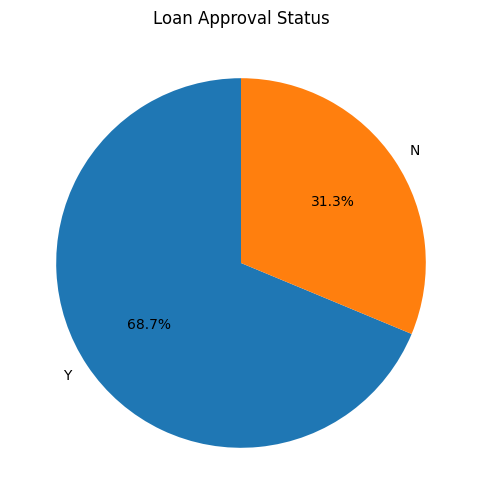

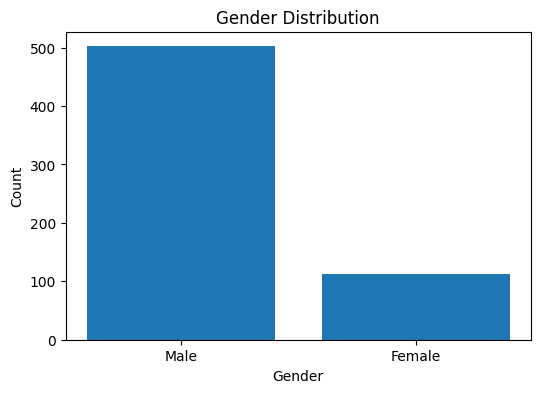

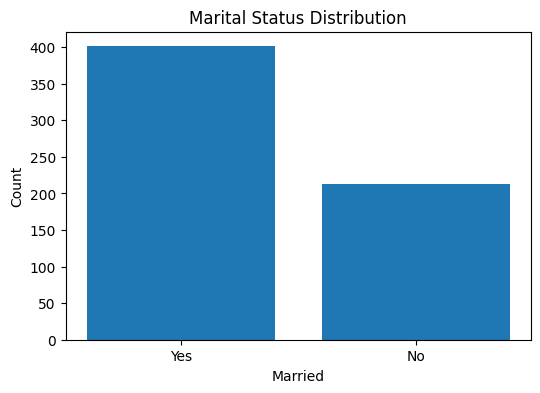

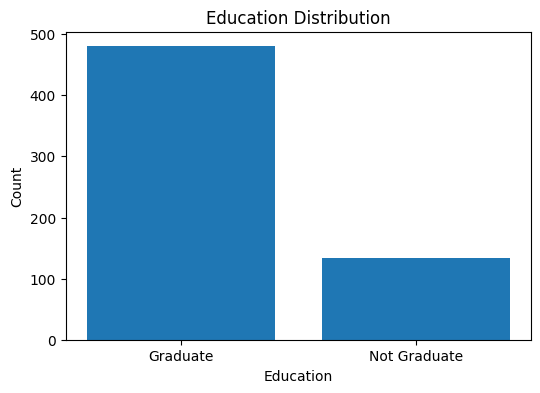

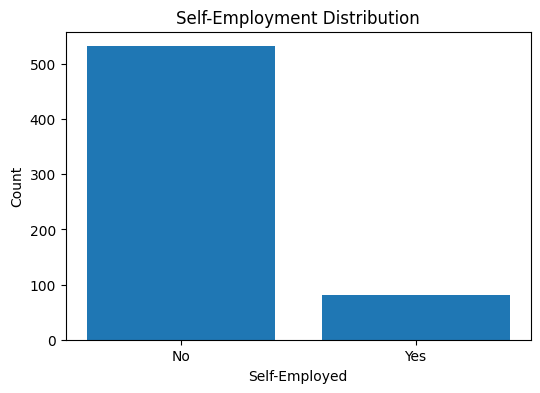

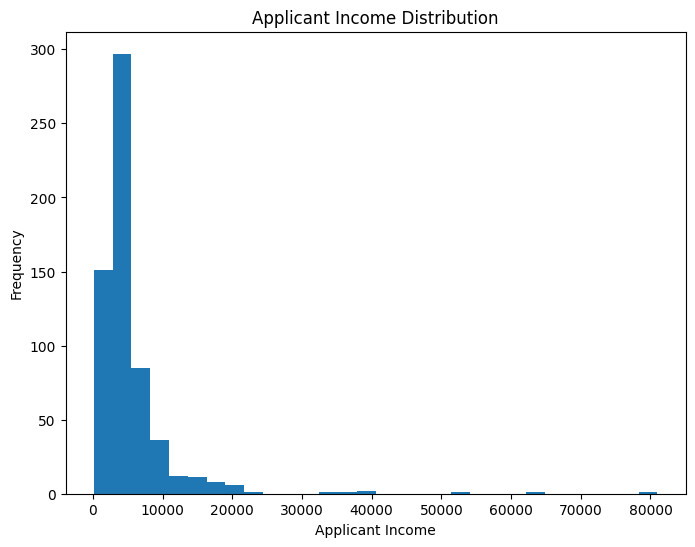

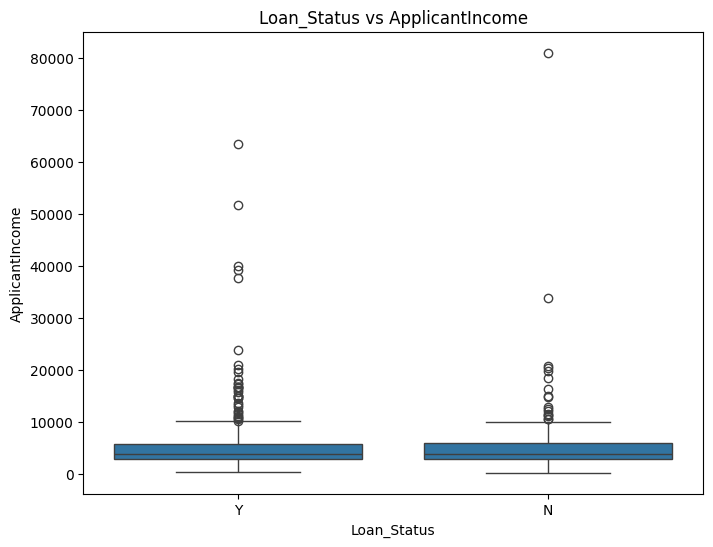

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# using plotly to visuals
# loan_status_count = df['Loan_Status'].value_counts()
# fig_loan_status = px.pie(loan_status_count,
#                          names=loan_status_count.index,
#                          title='Loan Approval Status')

#using matplotlib for ensure that visible in github
# 1. Pie chart for 'Loan Approval Status'
loan_status_count = df['Loan_Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Approval Status')
plt.show()

# 2. Bar plot for 'Gender Distribution'
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_count.index, gender_count.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Bar plot for 'Marital Status Distribution'
married_count = df['Married'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(married_count.index, married_count.values)
plt.title('Marital Status Distribution')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

# 4. Bar plot for 'Education Distribution'
education_count = df['Education'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(education_count.index, education_count.values)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# 5. Bar plot for 'Self-Employment Distribution'
self_employed_count = df['Self_Employed'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(self_employed_count.index, self_employed_count.values)
plt.title('Self-Employment Distribution')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()

# 6. Histogram for 'Applicant Income Distribution'
plt.figure(figsize=(8, 6))
plt.hist(df['ApplicantIncome'], bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# 7. Box plot for 'Loan_Status vs ApplicantIncome'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Loan_Status vs ApplicantIncome')
plt.show()

# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [39]:

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]
# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

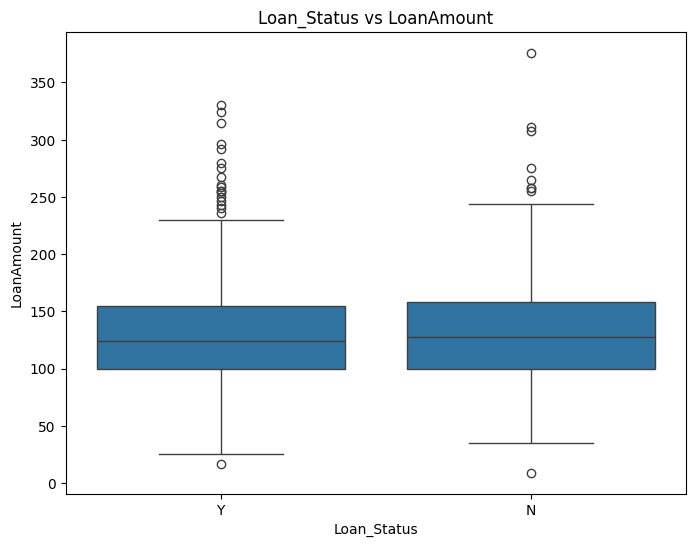

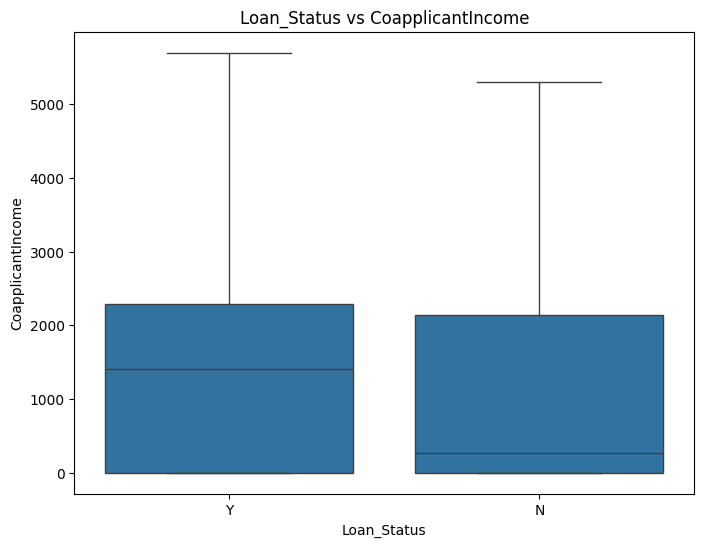

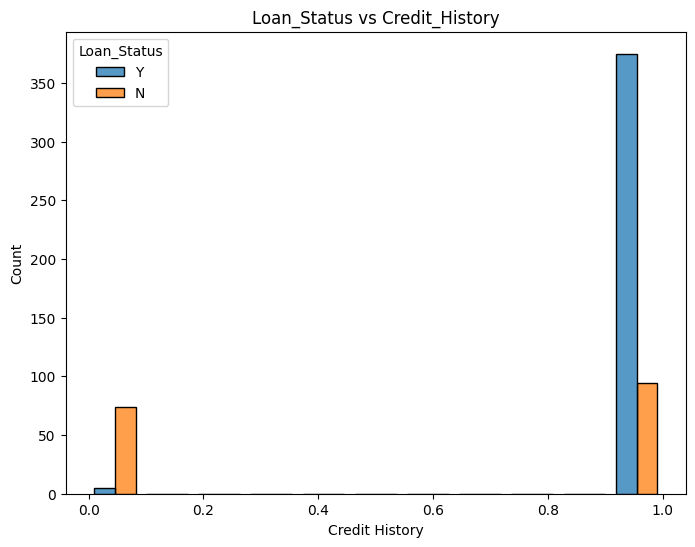

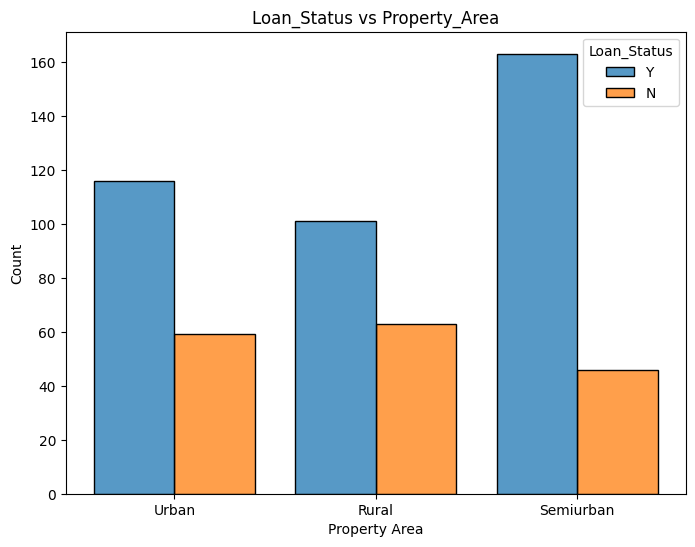

In [40]:
# Remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

# 8. Box plot for 'Loan_Status vs LoanAmount'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan_Status vs LoanAmount')
plt.show()

# 9. Box plot for 'Loan_Status vs CoapplicantIncome'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Loan_Status vs CoapplicantIncome')
plt.show()

# 10. Histogram for 'Loan_Status vs Credit_His'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Credit_History', hue='Loan_Status', multiple='dodge', shrink=.8)
plt.title('Loan_Status vs Credit_History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

# 11. Histogram for 'Loan_Status vs Property_Area'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Property_Area', hue='Loan_Status', multiple='dodge', shrink=.8)
plt.title('Loan_Status vs Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

In [41]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols)

In [42]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)


['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']


In [43]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
277        -0.544528          -0.037922   -0.983772          0.305159   
84         -0.067325          -0.931554   -1.571353         -1.430680   
275        -0.734870           0.334654   -0.298262          0.305159   
392        -0.824919           0.522317   -0.200332          0.305159   
537        -0.267373          -0.931554   -0.454950          0.305159   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
277        0.402248          False         True       False         True   
84         0.402248          False         True       False         True   
275        0.402248          False         True       False         True   
392        0.402248          False         True       False         True   
537        0.402248          False         True        True        False   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate  \
277          True  ...       

In [44]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))


0.8272727272727273


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.94      0.49      0.64        35
           Y       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110

